# Housing Price Predictor


This project uses California Housing Prices dataset, 1990 census, from Kaggle for predicting median house values using regression models.

# Linear Regression Model for Housing Price Predictor

In [24]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error


In [25]:
#loading data
data = pd.read_csv("housing.csv")
data.head()
data.info()
data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [26]:
data.dropna(inplace=True) #handle missing values


Exploratory Data Analysis

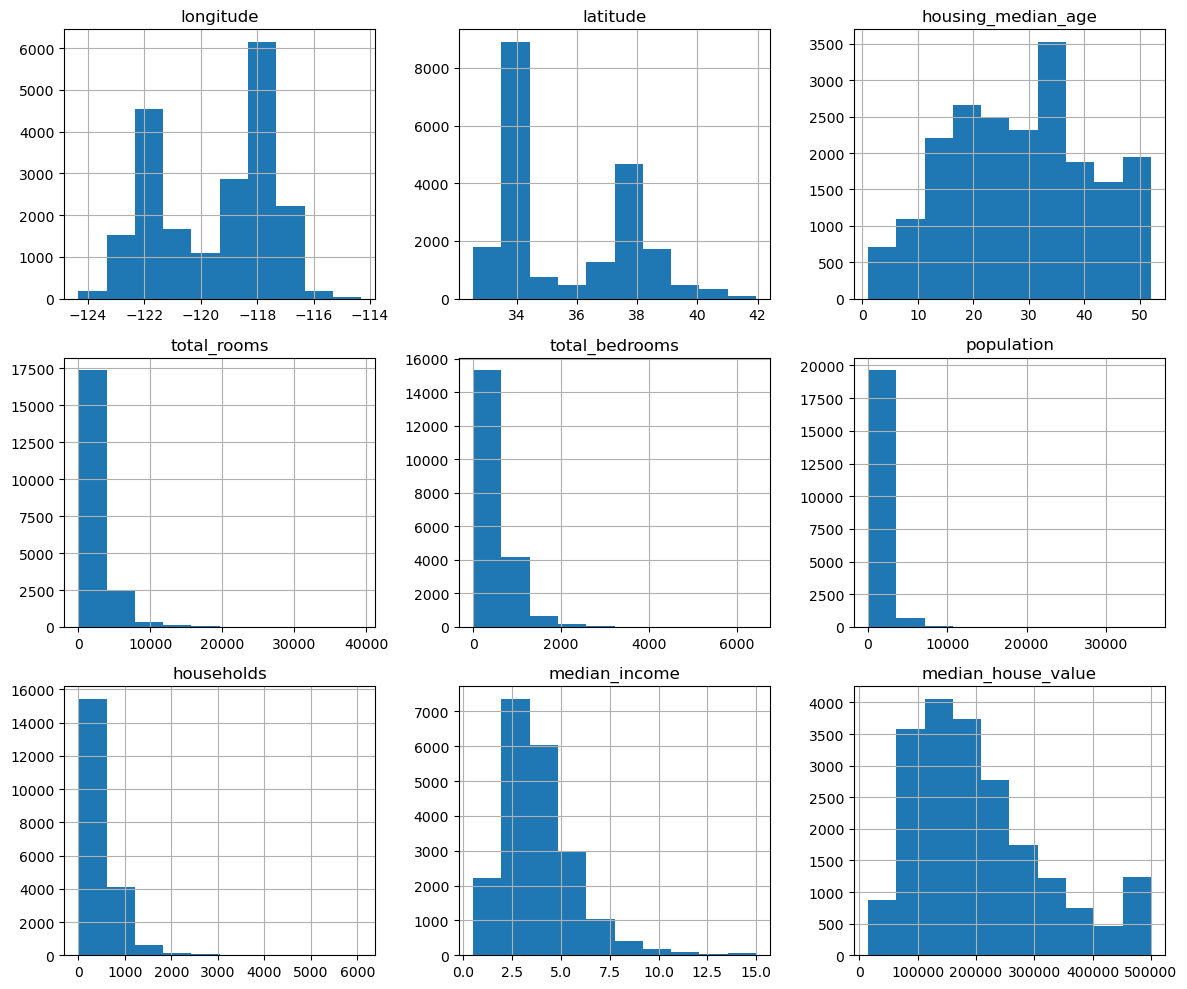

In [27]:
data.hist(figsize=(12,10))
plt.tight_layout()


/var/folders/z6/3ssxxk8d1ddb7ksbklqt9tpm0000gn/T/ipykernel_19343/385105732.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=False, cmap="YlGnBu")


<Axes: >

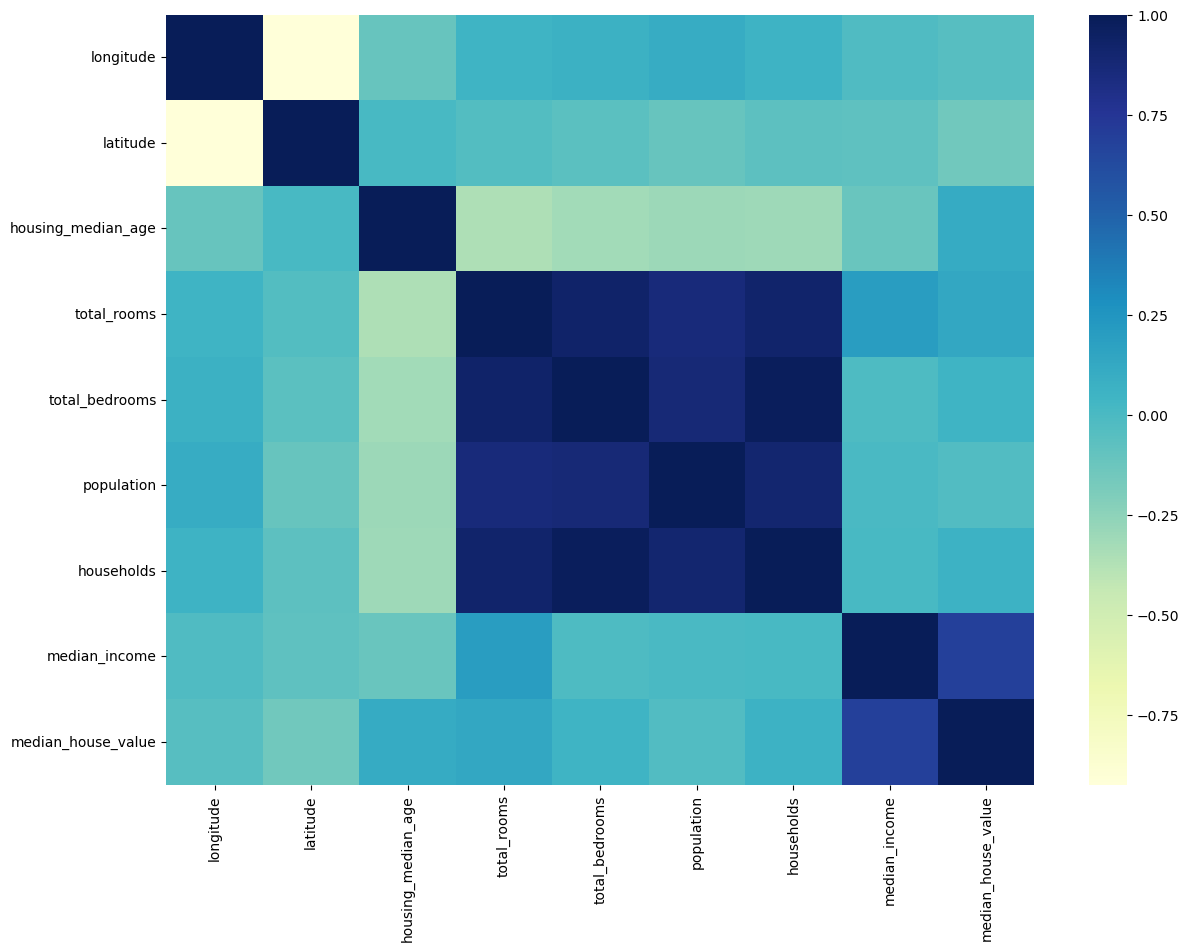

In [28]:
plt.figure(figsize=(14,10))
sns.heatmap(data.corr(), annot=False, cmap="YlGnBu")


 Train Test Split

In [29]:
X = data.drop("median_house_value", axis=1)
y = data["median_house_value"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


Preprocessing Function

In [30]:
def preprocess(df):
    df = df.copy()

    # Log transforms
    for col in ["total_rooms", "total_bedrooms", "population", "households"]:
        df[col] = np.log(df[col] + 1)

    # Feature engineering
    df["bedroom_ratio"] = df["total_bedrooms"] / df["total_rooms"]
    df["households_rooms"] = df["total_rooms"] / df["households"]

    # One-hot encode
    df = pd.get_dummies(df)

    return df


In [31]:
X_train_prep = preprocess(X_train)
X_test_prep = preprocess(X_test)

# Align columns
X_test_prep = X_test_prep.reindex(columns=X_train_prep.columns, fill_value=0)


In [32]:
#scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_prep)
X_test_scaled = scaler.transform(X_test_prep)


In [33]:
reg = LinearRegression()
reg.fit(X_train_scaled, y_train)


LinearRegression()

In [34]:
y_pred = reg.predict(X_test_scaled)

print("R²:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


R²: 0.6687477836522522
RMSE: 67304.78396321293


# Random Forest Model

In [35]:
print(data.columns)

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')


In [48]:
print(X_train.dtypes)


longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
ocean_proximity        object
dtype: object


In [49]:
# Convert the categorical column to numeric columns
X = pd.get_dummies(X, columns=['ocean_proximity'], drop_first=True)

# Fill missing values (if any)
X = X.fillna(0)

# Then split into train/test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [50]:
print(X_train.dtypes)


longitude                     float64
latitude                      float64
housing_median_age            float64
total_rooms                   float64
total_bedrooms                float64
population                    float64
households                    float64
median_income                 float64
ocean_proximity_INLAND          uint8
ocean_proximity_ISLAND          uint8
ocean_proximity_NEAR BAY        uint8
ocean_proximity_NEAR OCEAN      uint8
dtype: object


In [51]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

rf = RandomForestRegressor(
    n_estimators=300,
    random_state=42,
    max_depth=None
)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("RMSE:", rmse)


RMSE: 48663.807936028505


# Gradient Boosting

In [52]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.


In [53]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [54]:
print(X.dtypes)


longitude                     float64
latitude                      float64
housing_median_age            float64
total_rooms                   float64
total_bedrooms                float64
population                    float64
households                    float64
median_income                 float64
ocean_proximity_INLAND          uint8
ocean_proximity_ISLAND          uint8
ocean_proximity_NEAR BAY        uint8
ocean_proximity_NEAR OCEAN      uint8
dtype: object


In [56]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

# Initialize XGBoost
xgb_model = XGBRegressor(
    n_estimators=100,   # number of trees
    learning_rate=0.1,  # step size
    max_depth=5,        # depth of each tree
    random_state=42
)

# Train the model
xgb_model.fit(X_train, y_train)

# Predict on test set
y_pred = xgb_model.predict(X_test)

# Evaluate
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = xgb_model.score(X_test, y_test)

print("RMSE:", rmse)
print("R² Score:", r2)


RMSE: 50435.00015610836
R² Score: 0.8139922769180719
